# MIS I Messkampange 1 - Gruppe 7

Zunächst habe ich im Ordner die Messergebnisse von allem anderen getrennt (manuell verschoben), damit gibt es wie ich finde einen einfacheren und übersichtlicheren Workflow. Im folgenden werden die notwendigen Module importiert, danach beginnt der Import.

In [22]:
import numpy as np              # math. Operation
import matplotlib.pyplot as plt # Plot
import scipy.io as sp           # loadmat()
import glob                     # path 

In [34]:
import os
ROOT_DIR = os.path.abspath(os.curdir)
ROOT_DIR

'/Users/xx/MIS'

## 1. Import und Strukturierung der gemessenen Daten

### 1.1 Messdaten
Messdaten gliedern sich in (halb)rechte und (halb)linke Position. Zunächst werden alle erfasste Daten  aus den .mat-datein ausgelesen (sortiert) und in einer Liste zusammengefasst. 

In [35]:
path_l = sorted(glob.glob(r"/Users/xx/MIS/20220603/links/*"))
path_r = sorted(glob.glob(r"/Users/xx/MIS/20220603/rechts/*"))

In [36]:
path_l

['/Users/xx/MIS/20220603/links/x0000_l.mat',
 '/Users/xx/MIS/20220603/links/x0040_l.mat',
 '/Users/xx/MIS/20220603/links/x0080_l.mat',
 '/Users/xx/MIS/20220603/links/x0120_l.mat',
 '/Users/xx/MIS/20220603/links/x0160_l.mat',
 '/Users/xx/MIS/20220603/links/x0200_l.mat',
 '/Users/xx/MIS/20220603/links/x0240_l.mat',
 '/Users/xx/MIS/20220603/links/x0280_l.mat',
 '/Users/xx/MIS/20220603/links/x0320_l.mat',
 '/Users/xx/MIS/20220603/links/x0360_l.mat',
 '/Users/xx/MIS/20220603/links/x0400_l.mat',
 '/Users/xx/MIS/20220603/links/x0440_l.mat',
 '/Users/xx/MIS/20220603/links/x0480_l.mat',
 '/Users/xx/MIS/20220603/links/x0520_l.mat',
 '/Users/xx/MIS/20220603/links/x0560_l.mat',
 '/Users/xx/MIS/20220603/links/x0600_l.mat',
 '/Users/xx/MIS/20220603/links/x0640_l.mat',
 '/Users/xx/MIS/20220603/links/x0680_l.mat',
 '/Users/xx/MIS/20220603/links/x0720_l.mat',
 '/Users/xx/MIS/20220603/links/x0760_l.mat',
 '/Users/xx/MIS/20220603/links/x0800_l.mat']

In [37]:
# Einlesen der Messdaten und speichern in einer Liste
# links
data_l = []
for i in path_l:
    data_l.append(sp.loadmat(i))
# rechts   
data_r = []
for i in path_r:
    data_r.append(sp.loadmat(i))

Im nächsten Schritt werden die jeweiligen Varaiblen in eigene Arrays - für Links und Rechts seperat - untergliedert (gleiche Höhe für gleiche Indices). Zusätzlich werden die x-Positionen **("Höhe")** einmalig ausgelesen, damit diese dann einfach als Legende anzufügen sind. Ebenfalls werden die Messpunkte für die x-Achse erstellt **("Messung")**.

In [38]:
# Aufspalten in verarbeitbare Arrays für Plot - Darstellung

# Höhe in x- Richtung, y,z unverändert (links und rechts gleich)
x_höhe = [data_l[j]['x'].tolist() for j in range(len(data_l))]

# links
P_tot_l = np.array([data_l[j]['P_tot'] for j in range(len(data_l))])    # Gesamtdruck
P_stat_l = np.array([data_l[j]['P_stat'] for j in range(len(data_l))])  # statischer Druck
U_l = np.array([data_l[j]['U'] for j in range(len(data_l))])            # Geschwindigkeit U
V_l = np.array([data_l[j]['V'] for j in range(len(data_l))])            # Geschwindigkeit V
W_l = np.array([data_l[j]['W'] for j in range(len(data_l))])            # Geschwindigkeit W
mach_l = np.array([data_l[j]['mach'] for j in range(len(data_l))])      # Machzahl 
bara_pressure_l = np.array([data_l[j]['bara_pressure'] for j in range(len(data_l))]) # Umgebungsdruck ?
temperatur_l = np.array([data_l[j]['temperature'] for j in range(len(data_l))])      # Temeperatur, sollte gleich bleiben
velocity_l = np.array([data_l[j]['velocity'] for j in range(len(data_l))])           # Anströmgeschwindigkeit

# rechts
P_tot_r = np.array([data_r[j]['P_tot'] for j in range(len(data_r))])    # Gesamtdruck
P_stat_r = np.array([data_r[j]['P_stat'] for j in range(len(data_r))])  # statischer Druck
U_r = np.array([data_r[j]['U'] for j in range(len(data_r))])            # Geschwindigkeit U
V_r = np.array([data_r[j]['V'] for j in range(len(data_r))])            # Geschwindigkeit V
W_r = np.array([data_r[j]['W'] for j in range(len(data_r))])            # Geschwindigkeit W
mach_r = np.array([data_r[j]['mach'] for j in range(len(data_r))])      # Machzahl 
bara_pressure_r = np.array([data_r[j]['bara_pressure'] for j in range(len(data_r))]) # Umgebungsdruck ?
temperatur_r = np.array([data_r[j]['temperature'] for j in range(len(data_r))])      # Temeperatur, sollte gleich bleiben
velocity_r = np.array([data_r[j]['velocity'] for j in range(len(data_r))])           # Anströmgeschwindigkeit

Messung = np.arange(0,len(P_tot_l[0]),1) # 10000 Messungenpunkte
Höhe = [str(x_höhe[x])[2:-2]+' mm' for x in range(len(x_höhe))] # Höhe "schönmachen"

### 1.2 Zusätzliche Datein

Es folgt das einlesen der restlichen Datein. 

In der Datei **average12h.mat**, befindet sich ein Dictionary mit allen Durchschnittswerten der jeweiligen Messungen (sprich bspw. mean von links 40 mm). Ob das jetzt notwendig ist, weiß ich noch nicht, weil das ließe sich auch aus den Messdaten schnell erstellen.

In [63]:
avg_l = sp.loadmat("/Users/xx/MIS/20220603/links_zusätzlich/average12h.mat")  # dict mit allen Durchschnittswerten
avg_r = sp.loadmat("/Users/xx/MIS/20220603/rechts_zusätzlich/average12h.mat") # dict mit allen Durchschnittswerten

In [64]:
type(avg_l), avg_l.keys()

(dict,
 dict_keys(['P_tot', 'P_stat', 'U', 'V', 'W', 'mach', 'x', 'y', 'z', 'bara_pressure', 'temperature', 'velocity']))

Darüberhinaus befinden sich hier noch andere Datein. Die erste Datei ist die **measurement_settings** Datei, sie ist in .txt  Form und gibt Informationen über die Einstellungen:

In [301]:
#links -> encoding muss/kann über Terminal gefunden werden UTF-8 ist fehlerhaft: file -I filename (mac), file -i filename (linux)
with open('MIS/20220603/links_zusätzlich/measurement_settings.txt', encoding="iso-8859-1", errors='ignore') as l:
    contents1 = l.readlines()
contents1

['Pressure Measurement Program Settings\n',
 'Date and Time: 03.Jun.2022 16:24:29\n',
 '\n',
 'Ambient Parameter\n',
 '\n',
 'Ambient Pressure [Pa] : \t101650,0\n',
 'Ambient Temperatur [°C] : \t21,20\n',
 'Relative Humidity [%] : \t50,00\n',
 'Ambient Density [kg/m^3] : \t1,1975\n',
 'Kinematic Viscosity [m^2/s] : \t1,5059E-5\n',
 '\n',
 'Sampling Parameter\n',
 '\n',
 'Sampling Rate [1/s] : \t1000,0\n',
 'Number of Samples per Channel :  10000\n',
 '\n',
 'Channel Parameter\n',
 '\n',
 'Phys. Address\tName\tMeas. Type\tSensor Range\tAmplifier Gain\tChannel Offset\n',
 'cDAQ9188-Druck1Mod2/ai0\t p01\t 1000 Pa\t 346,000000\t 0,076721\n',
 'cDAQ9188-Druck1Mod2/ai1\t p02\t 1000 Pa\t 346,000000\t 0,041479\n',
 'cDAQ9188-Druck1Mod2/ai2\t p03\t 1000 Pa\t 346,000000\t 0,040964\n',
 'cDAQ9188-Druck1Mod2/ai3\t p04\t 1000 Pa\t 346,000000\t 0,043316\n',
 'cDAQ9188-Druck1Mod2/ai4\t p05\t 1000 Pa\t 346,000000\t 0,022397\n',
 'cDAQ9188-Druck1Mod2/ai5\t p06\t 1000 Pa\t 346,000000\t -0,042512\n',
 'c

In [302]:
#rechts
with open('MIS/20220603/rechts_zusätzlich/measurement_settings.txt', encoding="iso-8859-1", errors='ignore') as r:
    contents2 = r.readlines()
contents2

['Pressure Measurement Program Settings\n',
 'Date and Time: 03.Jun.2022 16:55:34\n',
 '\n',
 'Ambient Parameter\n',
 '\n',
 'Ambient Pressure [Pa] : \t101650,0\n',
 'Ambient Temperatur [°C] : \t21,20\n',
 'Relative Humidity [%] : \t50,00\n',
 'Ambient Density [kg/m^3] : \t1,1975\n',
 'Kinematic Viscosity [m^2/s] : \t1,5059E-5\n',
 '\n',
 'Sampling Parameter\n',
 '\n',
 'Sampling Rate [1/s] : \t1000,0\n',
 'Number of Samples per Channel :  10000\n',
 '\n',
 'Channel Parameter\n',
 '\n',
 'Phys. Address\tName\tMeas. Type\tSensor Range\tAmplifier Gain\tChannel Offset\n',
 'cDAQ9188-Druck1Mod2/ai0\t p01\t 1000 Pa\t 346,000000\t 0,077338\n',
 'cDAQ9188-Druck1Mod2/ai1\t p02\t 1000 Pa\t 346,000000\t 0,042577\n',
 'cDAQ9188-Druck1Mod2/ai2\t p03\t 1000 Pa\t 346,000000\t 0,042155\n',
 'cDAQ9188-Druck1Mod2/ai3\t p04\t 1000 Pa\t 346,000000\t 0,044235\n',
 'cDAQ9188-Druck1Mod2/ai4\t p05\t 1000 Pa\t 346,000000\t 0,024545\n',
 'cDAQ9188-Druck1Mod2/ai5\t p06\t 1000 Pa\t 346,000000\t -0,041752\n',
 'c

(Wenn nötig kann ich noch alle leerzeichen und absätze (\t und \n) entfernen aber war grad zu faul )

In [303]:
l.close()
r.close()

Die **config_all.dat** Datei ist für uns überflüssig, sie beeinhaltet die Configuration von Labview - sprich in welcher Einheit wird gemessen...

Ansonsten wären da noch die tdms Datein, ihr Format ist LabView, hier können sich die Channel einzeln angesehen werden, könnt ihr ja mal in LabView machen, hab das hier grad nicht in dem Betriebssystem (Anleitung z.B. hier : [youtube](https://www.youtube.com/watch?v=PW2yR9xHwcQ)). Ansonsten im Folgenden eine Übersicht für Messhöhe 40 mm:

In [321]:
from nptdms import TdmsFile

tdms_file = TdmsFile.read("MIS/20220603/links_zusätzlich/measurement_data.tdms")
tdms_file.groups()[1].channels()

[<TdmsChannel with path /'x=+0000,000mm_y=+0000,000mm_z=+0000,000mm'/'cDAQ9188-Druck1Mod2/ai0'>,
 <TdmsChannel with path /'x=+0000,000mm_y=+0000,000mm_z=+0000,000mm'/'cDAQ9188-Druck1Mod2/ai1'>,
 <TdmsChannel with path /'x=+0000,000mm_y=+0000,000mm_z=+0000,000mm'/'cDAQ9188-Druck1Mod2/ai2'>,
 <TdmsChannel with path /'x=+0000,000mm_y=+0000,000mm_z=+0000,000mm'/'cDAQ9188-Druck1Mod2/ai3'>,
 <TdmsChannel with path /'x=+0000,000mm_y=+0000,000mm_z=+0000,000mm'/'cDAQ9188-Druck1Mod2/ai4'>,
 <TdmsChannel with path /'x=+0000,000mm_y=+0000,000mm_z=+0000,000mm'/'cDAQ9188-Druck1Mod2/ai5'>,
 <TdmsChannel with path /'x=+0000,000mm_y=+0000,000mm_z=+0000,000mm'/'cDAQ9188-Druck1Mod2/ai6'>,
 <TdmsChannel with path /'x=+0000,000mm_y=+0000,000mm_z=+0000,000mm'/'cDAQ9188-Druck1Mod2/ai7'>,
 <TdmsChannel with path /'x=+0000,000mm_y=+0000,000mm_z=+0000,000mm'/'cDAQ9188-Druck1Mod2/ai8'>,
 <TdmsChannel with path /'x=+0000,000mm_y=+0000,000mm_z=+0000,000mm'/'cDAQ9188-Druck1Mod2/ai9'>,
 <TdmsChannel with path /'x=+0

## 2. Visualisierung

Erstmal habe ich versuchsweise irgendwas aus unsern Daten gepolottet damit man mal sieht ob es funktioniert.

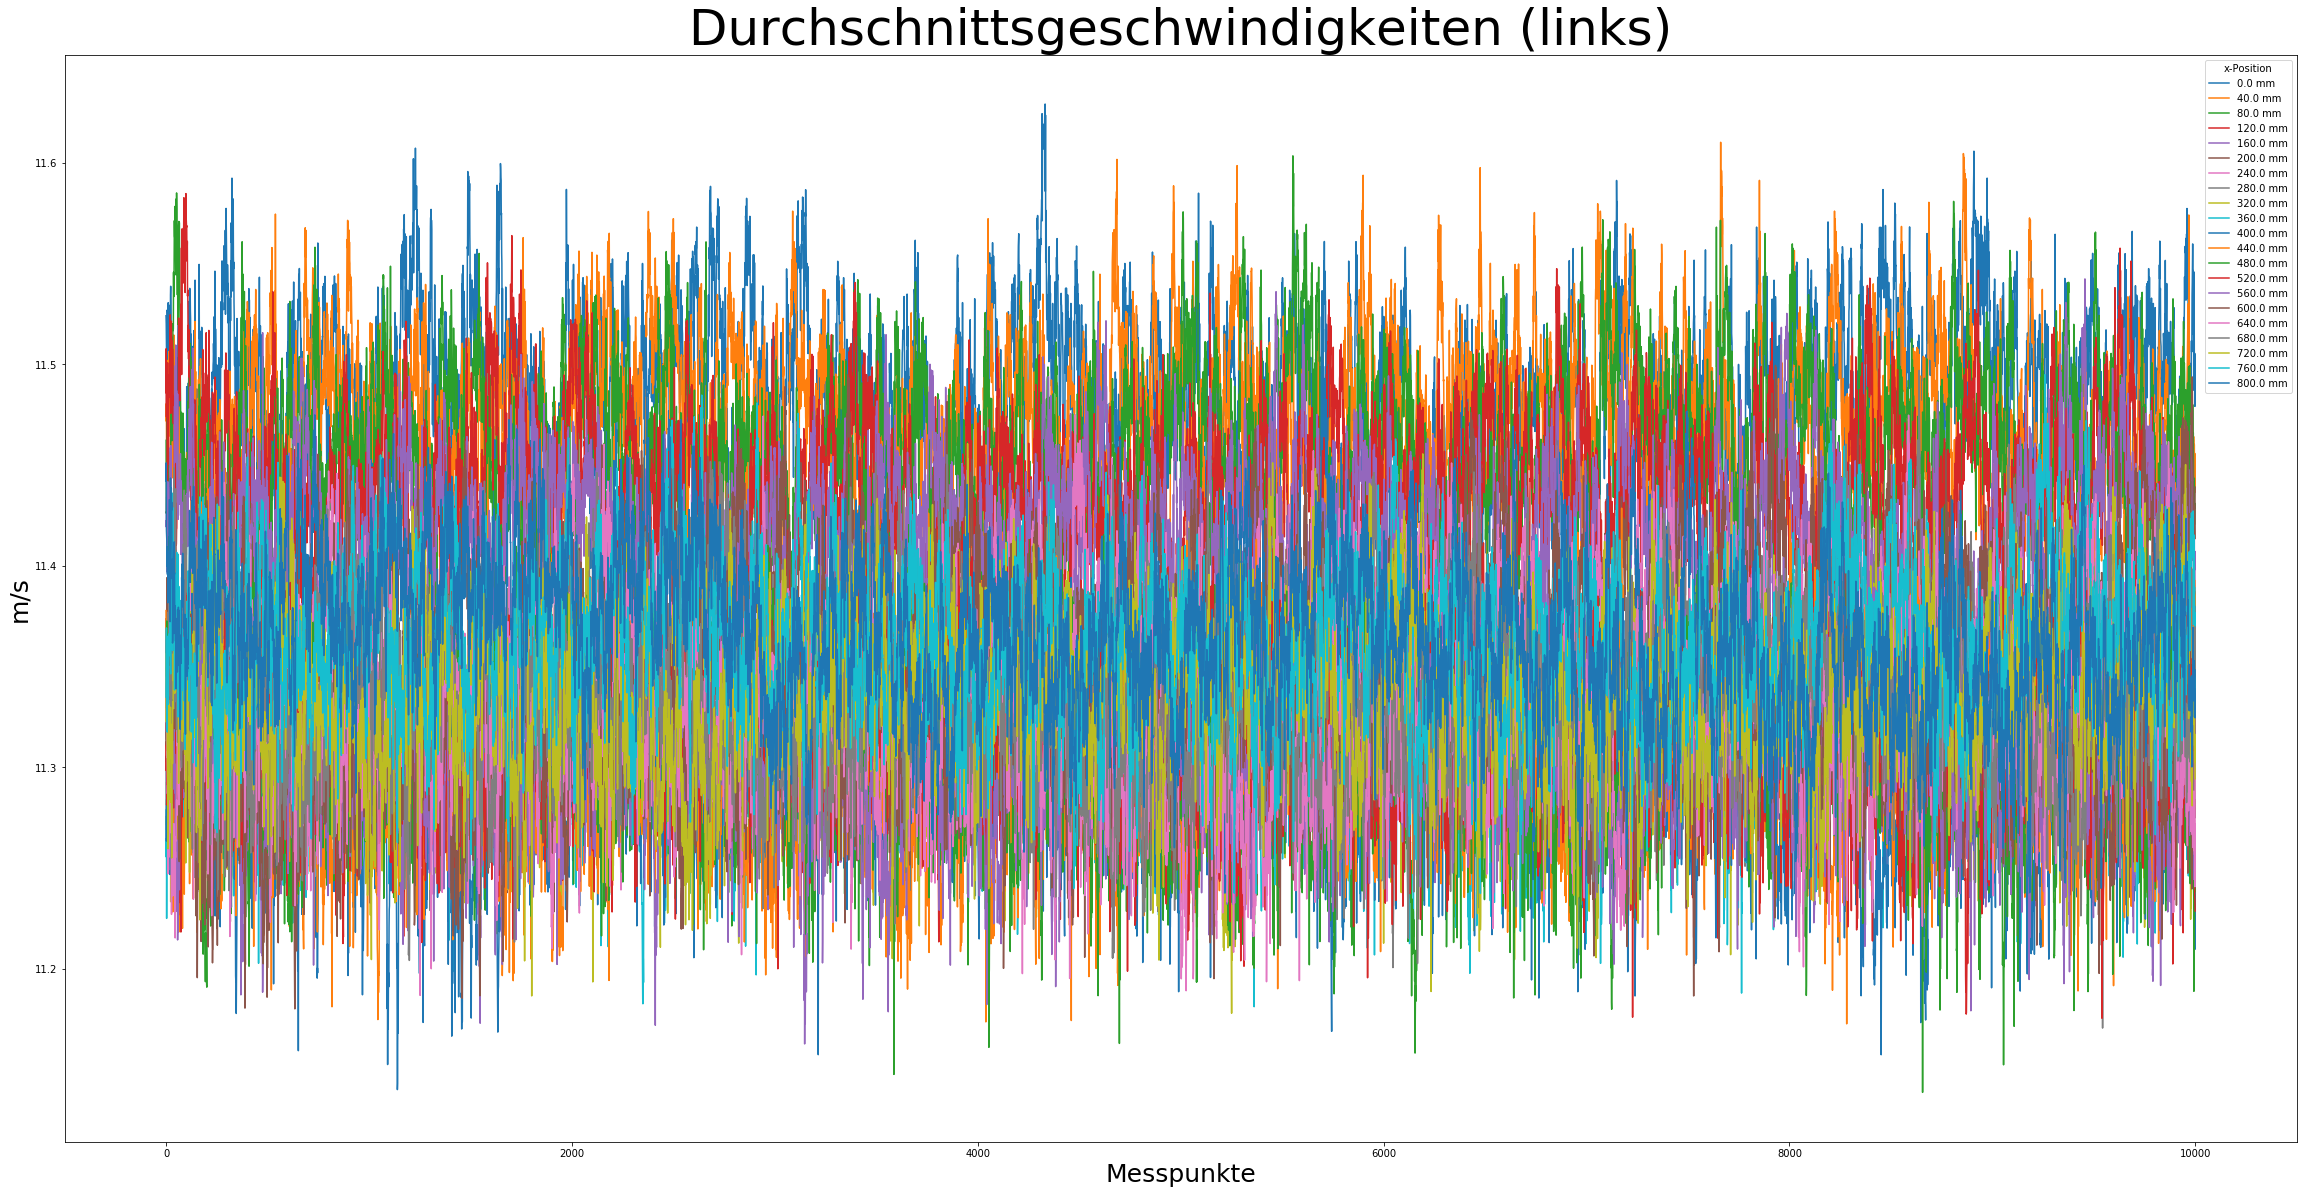

Vektoriell gemessene Durchschnitts-Gesamtgeschwindigkeit (links): 11.3663 m/s
Durchschnittliche Anströmgeschwindigkeit (links) 11.698 m/s


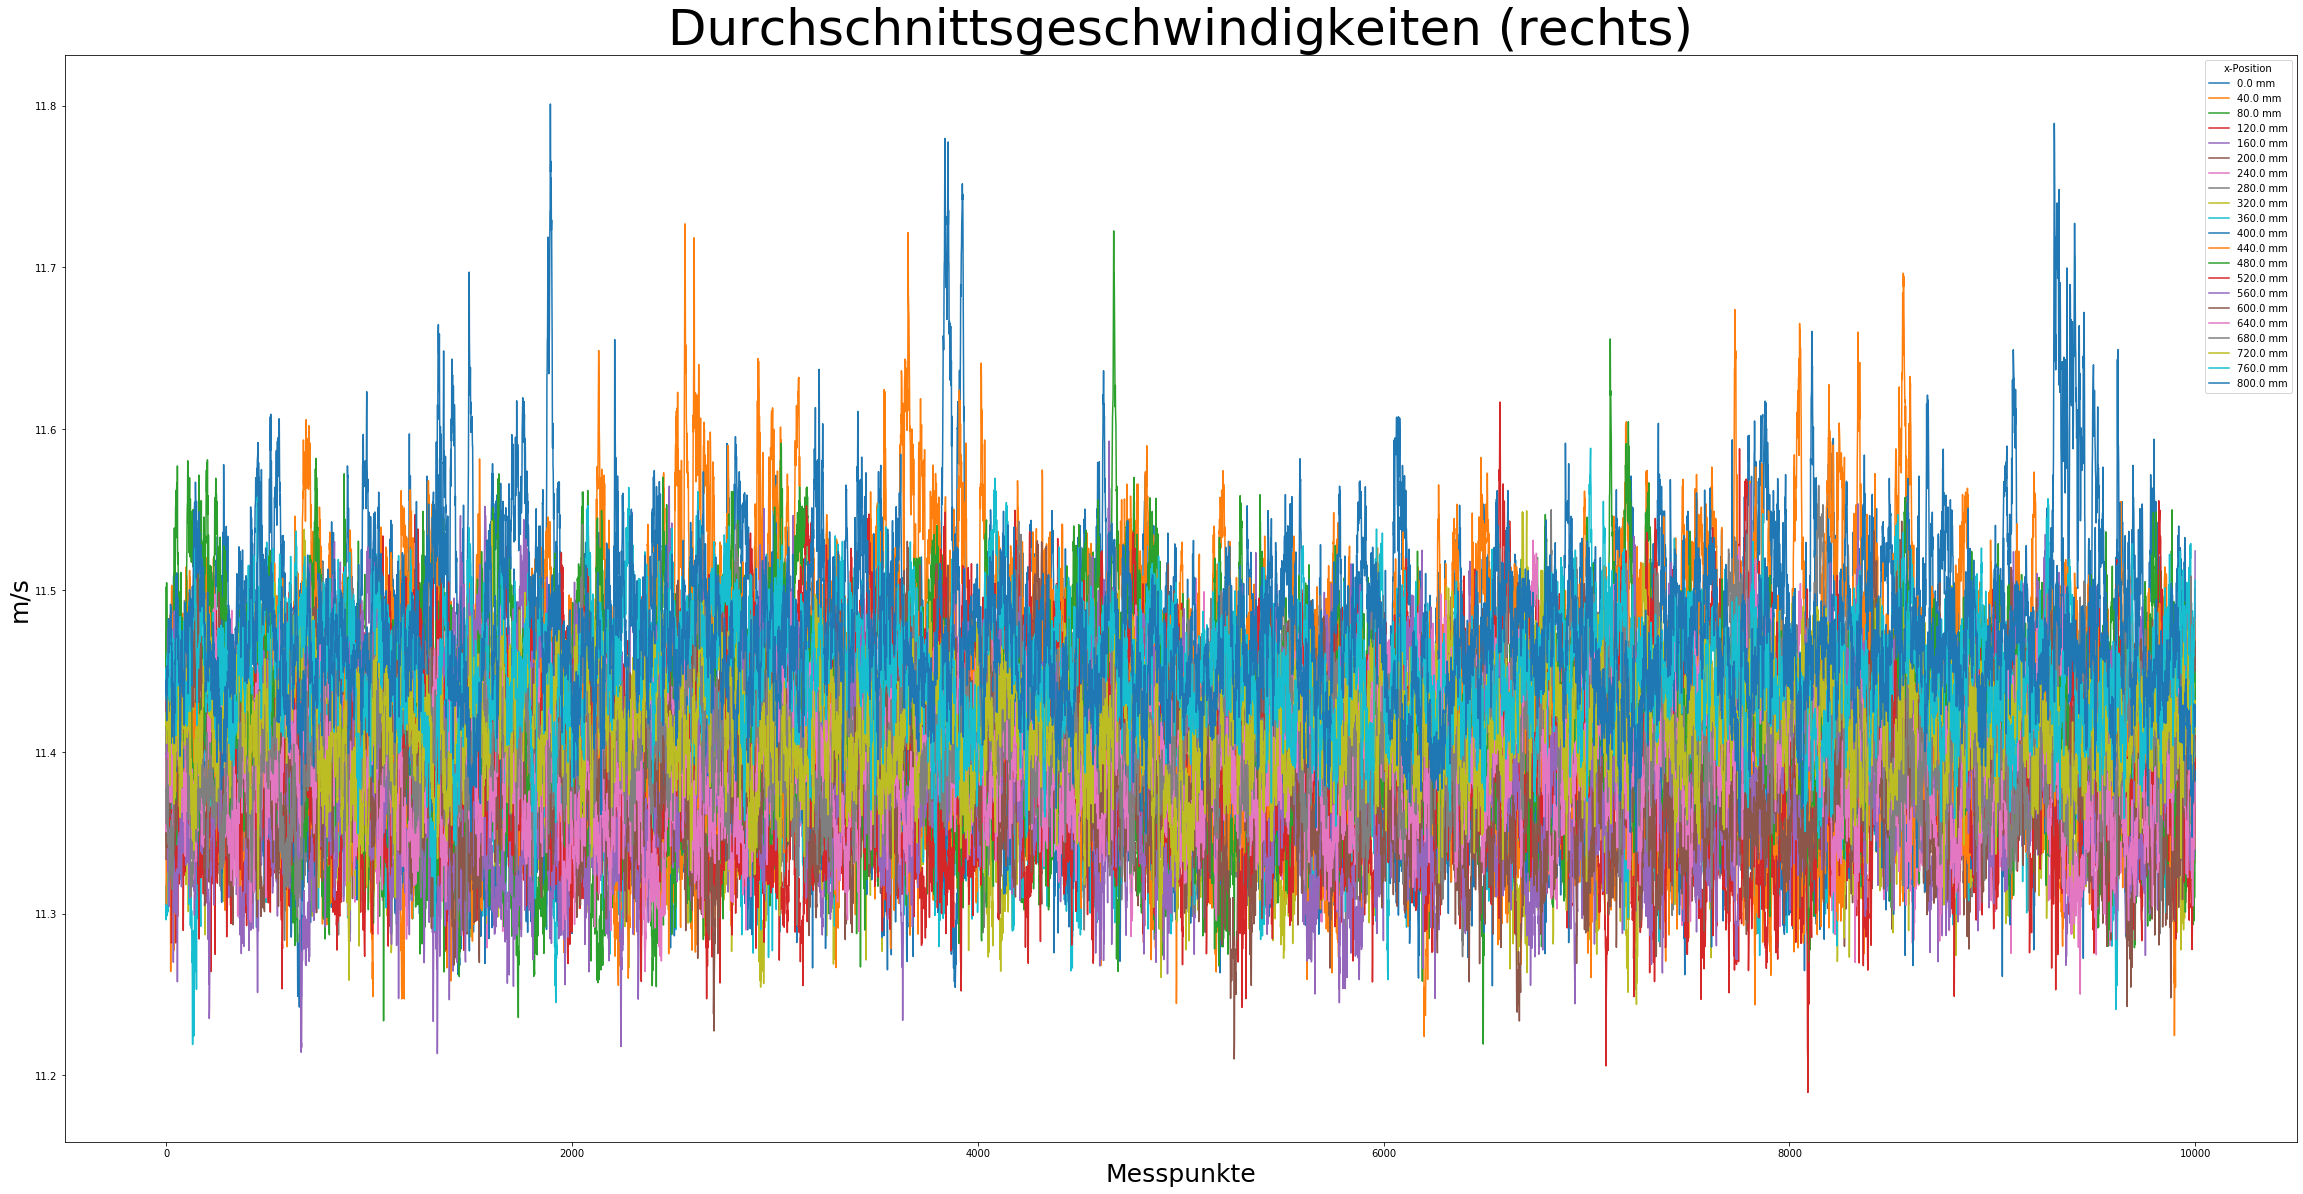

Vektoriell gemessene Durchschnitts-Gesamtgeschwindigkeit (links): 11.4684 m/s
Durchschnittliche Anströmgeschwindigkeit (links) 11.6113 m/s


In [237]:
# Besipiel/Probe Plot

plt.figure(figsize= (40,20))
for k in range(len(x_höhe)):
    plt.plot(Messung, np.sqrt(U_l[k]**2 +V_l[k]**2 + W_l[k]**2))
    plt.title("Durchschnittsgeschwindigkeiten (links)", size = 50)
    plt.xlabel("Messpunkte", size = 25)
    plt.ylabel("m/s", size = 25)
    plt.legend(Höhe, loc = 'best', title = "x-Position")
plt.show()
print('Vektoriell gemessene Durchschnitts-Gesamtgeschwindigkeit (links):', np.mean(np.sqrt(U_l[k]**2 +V_l[k]**2 + W_l[k]**2)).round(4),'m/s'),  # Durchschnittsgeschwindigkeit über Vektoren
print('Durchschnittliche Anströmgeschwindigkeit (links)',np.mean(velocity_l).round(4),'m/s')

plt.figure(figsize= (40,20))
for k in range(len(x_höhe)):
    plt.plot(Messung, np.sqrt(U_r[k]**2 +V_r[k]**2 + W_r[k]**2))
    plt.title("Durchschnittsgeschwindigkeiten (rechts)", size = 50)
    plt.xlabel("Messpunkte", size = 25)
    plt.ylabel("m/s", size = 25)
    plt.legend(Höhe, loc = 'best',title = "x-Position")
plt.show()
print('Vektoriell gemessene Durchschnitts-Gesamtgeschwindigkeit (links):', np.mean(np.sqrt(U_r[k]**2 +V_r[k]**2 + W_r[k]**2)).round(4),'m/s'),  # Durchschnittsgeschwindigkeit über Vektoren
print('Durchschnittliche Anströmgeschwindigkeit (links)',np.mean(velocity_r).round(4),'m/s')


**Aufgabe 4**
gemittelte u,v,w geschwindingkeiten in allen Messpunkten:

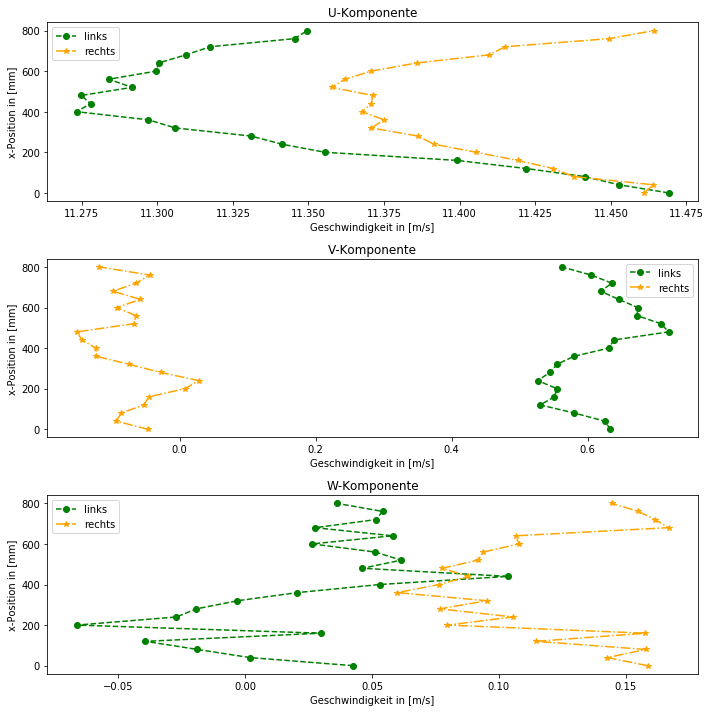

In [190]:
fig, (ax1 , ax2, ax3 ) = plt.subplots(3,1,figsize = (10,10))
ax1.plot(avg_l['U'], avg_l['x'], color = "green", linestyle =  "dashed", label= "links",marker = "o")
ax1.plot(avg_r['U'], avg_r['x'], color = "orange", linestyle = "dashdot",label= "rechts",marker = "*")
ax1.legend()
ax1.set_title("U-Komponente")
ax1.set_xlabel("Geschwindigkeit in [m/s]")
ax1.set_ylabel("x-Position in [mm]")

ax2.plot(avg_l['V'], avg_l['x'], color = "green", linestyle =  "dashed", label= "links",marker = "o")
ax2.plot(avg_r['V'], avg_r['x'], color = "orange", linestyle = "dashdot",label= "rechts",marker = "*")
ax2.legend()
ax2.set_title("V-Komponente")
ax2.set_xlabel("Geschwindigkeit in [m/s]")
ax2.set_ylabel("x-Position in [mm]")

ax3.plot(avg_l['W'], avg_l['x'], color = "green", linestyle =  "dashed", label= "links",marker = "o")
ax3.plot(avg_r['W'], avg_r['x'], color = "orange", linestyle = "dashdot",label= "rechts",marker = "*")
ax3.legend()
ax3.set_title("W-Komponente")
ax3.set_xlabel("Geschwindigkeit in [m/s]")
ax3.set_ylabel("x-Position in [mm]")

fig.tight_layout()


**Aufgabe 5** Vergleich und Darstellung beider Schnitte (u,v,w)

In [183]:
# 3d Plot???

**Aufgabe 6** gemittelte u im vergleich mit Prandtl

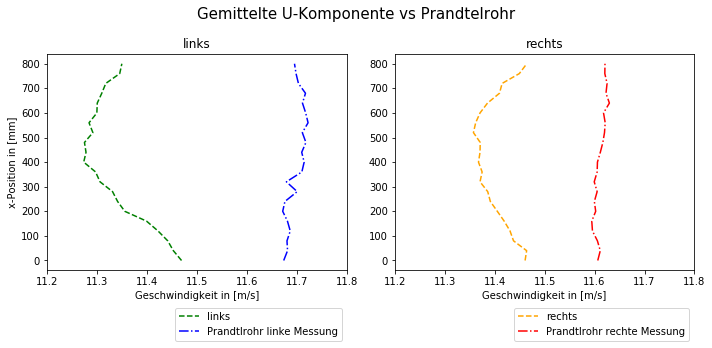

In [187]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.plot(avg_l['U'], avg_l['x'], color = "green", linestyle =  "dashed", label= "links")
ax1.plot(avg_l['velocity'], avg_l['x'], color = "blue", linestyle = "dashdot",label= "Prandtlrohr linke Messung")
ax2.plot(avg_r['U'], avg_r['x'], color = "orange", linestyle = "dashed",label= "rechts")
ax2.plot(avg_r['velocity'], avg_r['x'], color = "red", linestyle = "dashdot",label= "Prandtlrohr rechte Messung")
fig.suptitle("Gemittelte U-Komponente vs Prandtelrohr", size = 15)
ax1.set_title("links")
ax1.set_ylabel("x-Position in [mm]")
ax1.set_xlabel("Geschwindigkeit in [m/s]")
ax1.set_xlim(11.2,11.8)
ax2.set_title("rechts")
ax2.set_xlim(11.2,11.8)
ax2.set_xlabel("Geschwindigkeit in [m/s]")
ax1.legend(loc = "best",bbox_to_anchor=(1, -0.15))
ax2.legend(loc = "best",bbox_to_anchor=(1, -0.15))
fig.tight_layout()
fig.subplots_adjust(top=0.85)

**Aufgabe 7** Root Mean Square - u, v, w

In [129]:
rms_Ul = [np.sqrt(np.mean(U_l[i]**2)) for i in range(len(U_l))]
rms_Ur = [np.sqrt(np.mean(U_r[i]**2)) for i in range(len(U_r))]
rms_Vl = [np.sqrt(np.mean(V_l[i]**2)) for i in range(len(V_l))]
rms_Vr = [np.sqrt(np.mean(V_r[i]**2)) for i in range(len(V_r))]
rms_Wl = [np.sqrt(np.mean(W_l[i]**2)) for i in range(len(W_l))]
rms_Wr = [np.sqrt(np.mean(W_r[i]**2)) for i in range(len(W_r))]

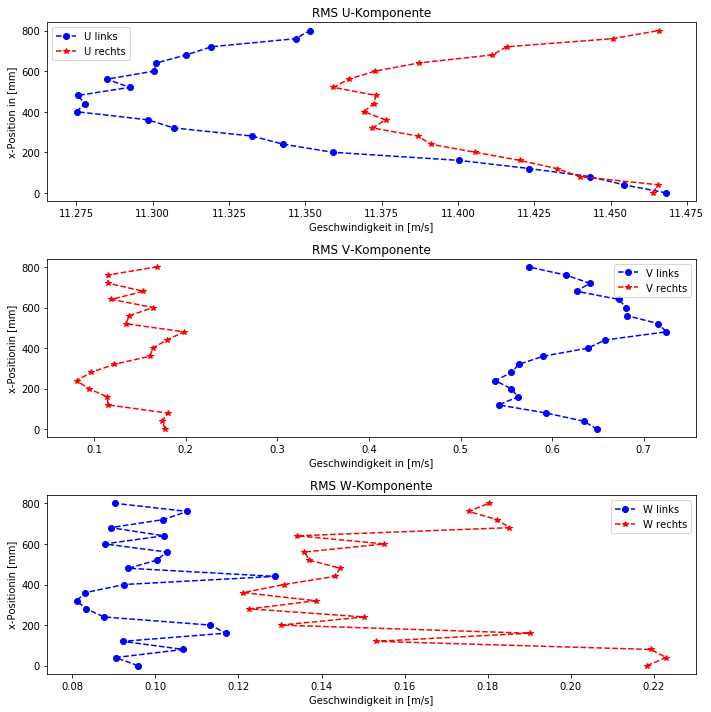

In [193]:
fig, (ax1 , ax2, ax3 ) = plt.subplots(3,1,figsize = (10,10))
ax1.plot(rms_Ul, avg_l['x'], label = "U links", ls = "--", color= "blue",marker = "o")
ax1.plot(rms_Ur, avg_l['x'], label = "U rechts",ls=  "--",color="red",marker = "*")
ax1.legend()
ax1.set_title("RMS U-Komponente")
ax1.set_xlabel("Geschwindigkeit in [m/s]")
ax1.set_ylabel("x-Position in [mm]")

ax2.plot(rms_Vl, avg_l['x'], label = "V links", ls= "--",color="blue",marker = "o")
ax2.plot(rms_Vr, avg_l['x'], label = "V rechts",ls=  "--",color="red",marker = "*")
ax2.legend()
ax2.set_title("RMS V-Komponente")
ax2.set_xlabel("Geschwindigkeit in [m/s]")
ax2.set_ylabel("x-Positionin [mm]")

ax3.plot(rms_Wl, avg_l['x'], label = "W links", ls= "dashed",color="blue",marker = "o")
ax3.plot(rms_Wr, avg_l['x'], label = "W rechts",ls=  "dashed",color="red",marker = "*")
ax3.legend()
ax3.set_title("RMS W-Komponente")
ax3.set_xlabel("Geschwindigkeit in [m/s]")
ax3.set_ylabel("x-Positionin [mm]")

fig.tight_layout()
plt.show()

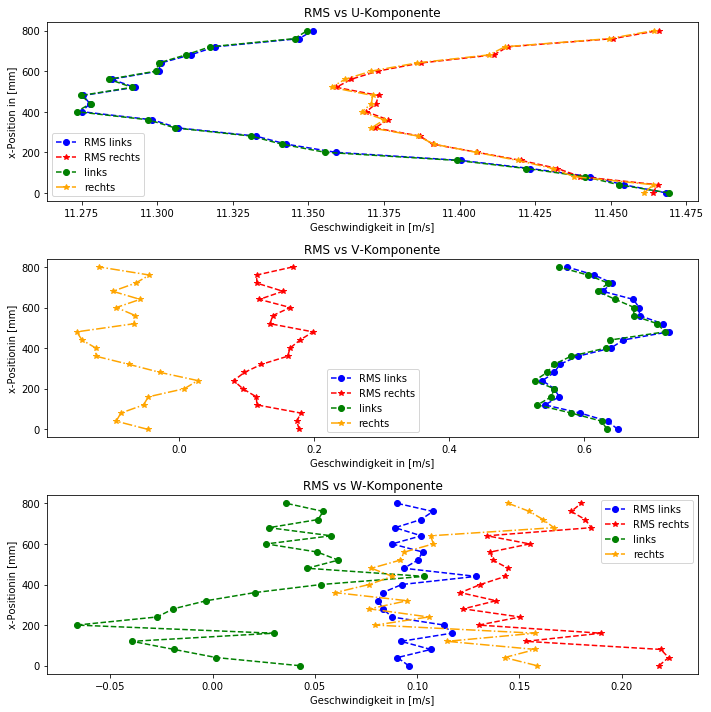

In [195]:
fig, (ax1 , ax2, ax3 ) = plt.subplots(3,1,figsize = (10,10))
ax1.plot(rms_Ul, avg_l['x'], label = "RMS links", ls = "--", color= "blue",marker = "o")
ax1.plot(rms_Ur, avg_l['x'], label = "RMS rechts",ls=  "--",color="red",marker = "*")
ax1.plot(avg_l['U'], avg_l['x'], color = "green", linestyle =  "dashed", label= "links",marker = "o")
ax1.plot(avg_r['U'], avg_r['x'], color = "orange", linestyle = "dashdot",label= "rechts",marker = "*")
ax1.legend()
ax1.set_title("RMS vs U-Komponente")
ax1.set_xlabel("Geschwindigkeit in [m/s]")
ax1.set_ylabel("x-Position in [mm]")

ax2.plot(rms_Vl, avg_l['x'], label = "RMS links", ls= "--",color="blue",marker = "o")
ax2.plot(rms_Vr, avg_l['x'], label = "RMS rechts",ls=  "--",color="red",marker = "*")
ax2.plot(avg_l['V'], avg_l['x'], color = "green", linestyle =  "dashed", label= "links",marker = "o")
ax2.plot(avg_r['V'], avg_r['x'], color = "orange", linestyle = "dashdot",label= "rechts",marker = "*")

ax2.legend()
ax2.set_title("RMS vs V-Komponente")
ax2.set_xlabel("Geschwindigkeit in [m/s]")
ax2.set_ylabel("x-Positionin [mm]")

ax3.plot(rms_Wl, avg_l['x'], label = "RMS links", ls= "dashed",color="blue",marker = "o")
ax3.plot(rms_Wr, avg_l['x'], label = "RMS rechts",ls=  "dashed",color="red",marker = "*")
ax3.plot(avg_l['W'], avg_l['x'], color = "green", linestyle =  "dashed", label= "links",marker = "o")
ax3.plot(avg_r['W'], avg_r['x'], color = "orange", linestyle = "dashdot",label= "rechts",marker = "*")

ax3.legend()
ax3.set_title("RMS vs W-Komponente")
ax3.set_xlabel("Geschwindigkeit in [m/s]")
ax3.set_ylabel("x-Positionin [mm]")

fig.tight_layout()
plt.show()

**Aufgabe 8** Zeitschrieb der u-Komponente zweier Messwerte (1x links, 1x rechts) 400

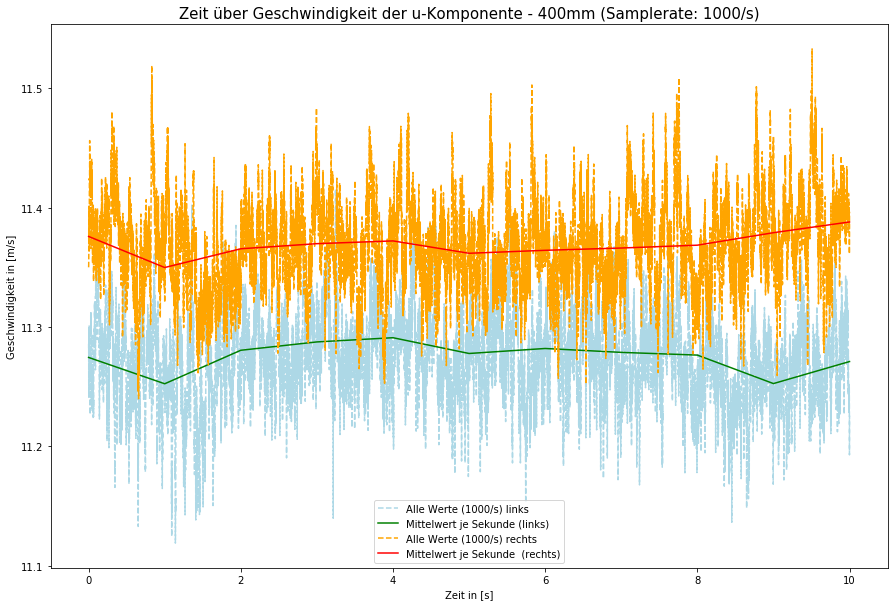

In [240]:
j = 10 # index für 400 mm

split_mean_l = np.array_split(U_l[j],11)
umsl = [np.mean(k) for k in split_mean_l]
split_mean_r = np.array_split(U_r[j],11)
umsr = [np.mean(k) for k in split_mean_r]

x_ax = np.linspace(0,10,10000)

plt.figure(figsize = (15,10))
plt.plot(x_ax,U_l[j], label = "Alle Werte (1000/s) links", color = "lightblue", ls = "--")
plt.plot(umsl, label = "Mittelwert je Sekunde (links)", color = "green", ls = "-")
plt.plot(x_ax,U_r[j], label = "Alle Werte (1000/s) rechts", color = "orange", ls = "--")
plt.plot(umsr, label = "Mittelwert je Sekunde  (rechts)", color = "red", ls = "-")
plt.title("Zeit über Geschwindigkeit der u-Komponente - 400mm (Samplerate: 1000/s)", size = 15)
plt.xlabel("Zeit in [s]")
plt.ylabel("Geschwindigkeit in [m/s]")
plt.legend(loc = "best")
plt.show()

**Aufgabe 9** Frequenzanalyse

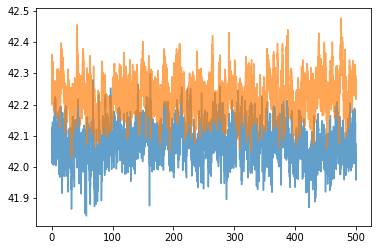

In [247]:
# Fourieranalyse
fs = 1000 #samplerate
ft = np.fft.rfft(U_l[j]) # diskrete Fourier-Transformation
absft = np.abs(ft) 
dBps = 20*np.log10(np.square(absft)) 
freq = np.linspace(0, fs/2, len(dBps))
ft2 = np.fft.rfft(U_r[j]) # diskrete Fourier-Transformation
absft2 = np.abs(ft2) 
dBps2 = 20*np.log10(np.square(absft2)) 
freq2 = np.linspace(0, fs/2, len(dBps2))
plt.plot(freq, dBps, alpha=0.7)
plt.plot(freq2, dBps2, alpha=0.7)